<center>

<img src="https://github.com/alfonso-santos/master-bilbao/blob/main/imgs/logo.PNG?raw=true"  alt="drawing" width="15%"/>

</center>

# Cálculos iniciales de carteras:



Una cartera es un conjunto de activos financieros, como acciones o bonos, seleccionados para alcanzar un objetivo financiero específico: maximizar el rendimiento, minimizar el riesgo o equilibrar ambos. La gestión de carteras implica decisiones estratégicas sobre asignación de activos, diversificación y ajustes periódicos según las condiciones del mercado. 

En este notebook, aprenderemos las nociones básicas para caracterizar una cartera en términos de rentabilidad y volatilidad a partir de los activos que la componen.

## Carteras de dos activos

Definir una cartera de activos implica especificar los diferentes instrumentos financieros o activos que la componen y la proporción en la que se invierte en cada uno. Si llamamos:

* $w_1$ a la proporción de la inversión en el activo $1$ $\Rightarrow w_2=1-w_1$. Debe cumplirse que $w_1 + w_2 = 1.0$ ya que representa el 100% de la inversión.

* $\bar R_p$ a la rentabilidad media o esperanza de la cartera $\Rightarrow \boldsymbol{\bar{R}_p = w_1 \bar{R}_1 + w_2 \bar{R}_2}$. Es una suma ponderada de la rentabilidad de cada activo por el porcentaje de inversión $w_i$ en cada activo.


* Varianza $\boldsymbol{\sigma_{P}^2 = w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_{12}} \quad siendo \quad \sigma_{12} = \rho_{12} \sigma_1 \sigma_2$, donde $\rho_{12}$ es el coeficiente de correlación entre los activos 1 y 2. La varianza de la cartera se ve afectada por las covarianzas ($\sigma_{12}$) entre los activos.

* Volatilidad $\sigma_{P} = \sqrt{\sigma_{P}^2}$

**NOTA: El riesgo (volatilidad de una cartera) no depende solo de las volatilidades de los activos que la componen sino también de cómo se relacionen esos activos entre sí (covarianzas)**

Definimos dos funciones:

* **calc_ret_cartera** una función que, dada una cartera, nos devuelve la rentabilidad esperada

* **calc_std_cartera** una función que, dada una cartera, nos devuelve la varianza de la cartera

* una cartera ejemplo con dos activos: **cartera**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
def calc_ret_cartera(w1, w2, r1, r2):
    return w1 * r1 + w2 * r2

In [3]:
def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [4]:
#definimos una cartera con dos activos
ret1 = 0.2 #retornos esperados del activo 1
ret2 = 0.1 #retornos esperados del activo 2

std1 = 0.25 #volatilidad del activo 1
std2 = 0.15 #volatilidad del activo 2

p1 = 0.4 #peso del activo 1
p2 = 0.6 #peso del activo 2

# definimos el coeficiente de correlación
coef_corr = 0.6

In [5]:
print(f'El retorno de la cartera es: {100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es: {100*calc_std_cartera(p1, p2, std1, std2, coef_corr):.2f} %')

El retorno de la cartera es: 14.00 %
La volatilidad de la cartera es: 17.00 %


#### Ahora vamos a hacerlo con activos reales. Descarga de datos.

In [6]:
activos = ["AAPL", "GLD", "MSFT", "SPY"]

start_date="2018-12-31"
end_date="2023-12-31"

data = yf.download(
    activos,
    start=start_date,
    end=end_date,
    auto_adjust=False,
    multi_level_index=True,
)['Adj Close']


data.info()

[*********************100%***********************]  4 of 4 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-12-31 to 2023-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1259 non-null   float64
 1   GLD     1259 non-null   float64
 2   MSFT    1259 non-null   float64
 3   SPY     1259 non-null   float64
dtypes: float64(4)
memory usage: 49.2 KB


Veo si faltan datos

In [7]:
data.isna().sum()

Ticker
AAPL    0
GLD     0
MSFT    0
SPY     0
dtype: int64

Calculo las rentabilidades diarias

In [8]:
rentabilidad = np.log(data).diff().dropna()

rentabilidad.head(5)

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2019-01-02,0.001141,0.000660,-0.004440,0.001040
2019-01-03,-0.104924,0.009025,-0.037482,-0.024152
2019-01-04,0.041803,-0.008119,0.045460,0.032947
2019-01-07,-0.002229,0.003453,0.001275,0.007854
2019-01-08,0.018884,-0.002712,0.007224,0.009351


In [9]:
# Puedes calcular los valores medios y la desviación estándar de cada columna así:
means = rentabilidad.mean() * 252
stds = rentabilidad.std() * np.sqrt(252)

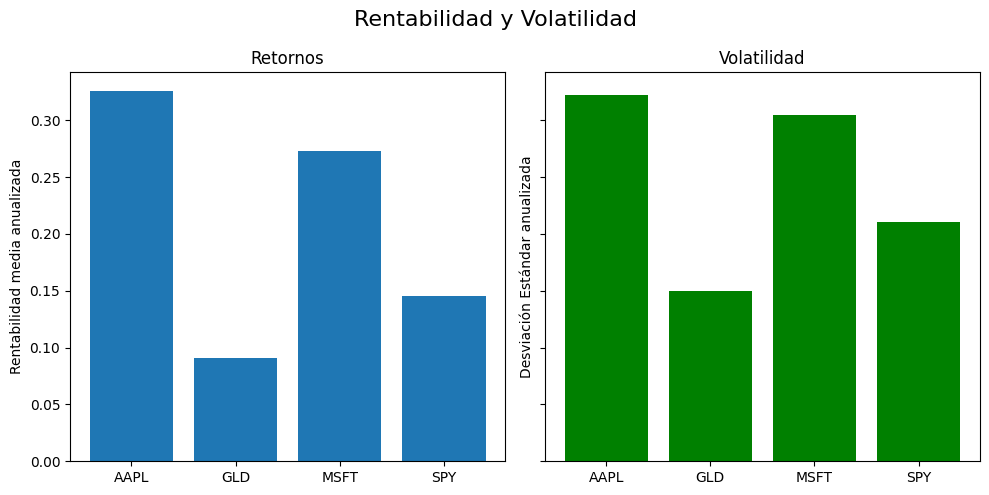

In [10]:
import matplotlib.pyplot as plt



# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Retornos")

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad", fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div style="background-color: #e0f7fa; padding: 10px;">

Calcula la rentabilidad y volatilidad anual de una cartera formada por un 60% de APPL y un 40% de GLD 

In [11]:
#definimos una cartera con dos activos
ret_aapl = rentabilidad['AAPL'].mean() * 252 #retornos esperados del activo 1
ret_gld = rentabilidad['GLD'].mean() * 252 #retornos esperados del activo 2    

std_aapl = rentabilidad['AAPL'].std() * np.sqrt(252) #volatilidad del activo 1
std_gld = rentabilidad['GLD'].std() * np.sqrt(252) #volatilidad del activo 2

p_aapl = 0.6 #peso del AAPL
p_gld = 0.4 #peso de GLD

# definimos el coeficiente de correlación
coef_corr = np.corrcoef(rentabilidad['AAPL'], rentabilidad['GLD'])[0, 1]

In [12]:
rent_cartera = calc_ret_cartera(p_aapl, p_gld, ret_aapl, ret_gld)
std_cartera = calc_std_cartera(p_aapl, p_gld, std_aapl, std_gld, coef_corr)

print(f'El retorno de la cartera es: {100*rent_cartera:.2f} %')
print(f'La volatilidad de la cartera es: {100*std_cartera:.2f} %')


El retorno de la cartera es: 23.20 %
La volatilidad de la cartera es: 20.73 %


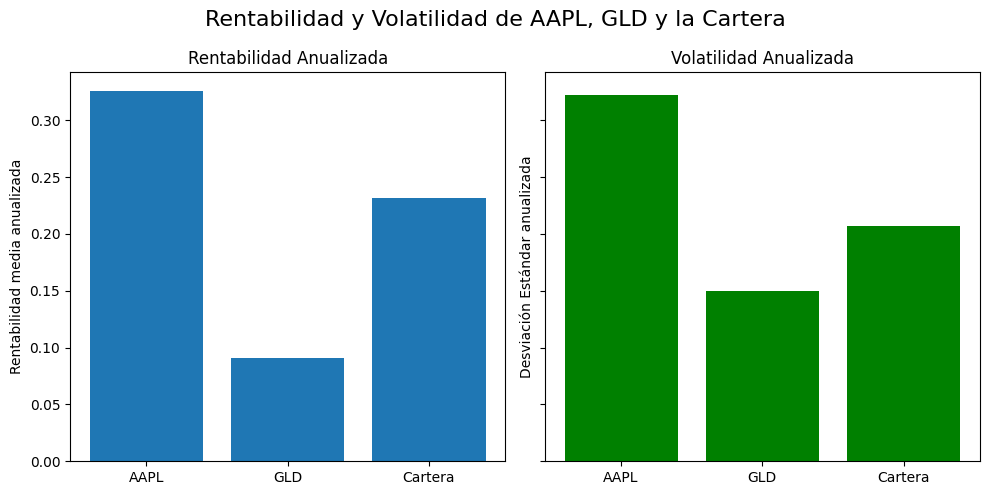

In [13]:
# Filtramos solo los activos que queremos mostrar, AAPL y GLD
means_filtered = means.loc[['AAPL', 'GLD']]
stds_filtered = stds.loc[['AAPL', 'GLD']]

# Añadimos los datos de la cartera
means_filtered['Cartera'] = rent_cartera
stds_filtered['Cartera'] = std_cartera

# Crear una figura con dos subplots, uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios (Rentabilidad) en el subplot de la izquierda
axes[0].bar(means_filtered.index, means_filtered.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Rentabilidad Anualizada")

# Crear el gráfico de barras de los valores de desviación estándar en el subplot de la derecha
axes[1].bar(stds_filtered.index, stds_filtered.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad Anualizada")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad de AAPL, GLD y la Cartera", fontsize=16)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div style="background-color: #e0f7fa; padding: 10px;">

Calcula 100 carteras distintas compuestas por AAPL y GLD, ajustando los pesos de manera equidistante entre ambos activos. Los datos de los activos son los siguientes:

Rentabilidades medias: ret_aapl, ret_gld  

Volatilidades: std_aapl, std_gld 

Coeficiente de correlación: coef_corr


In [14]:
pesos_aapl = np.linspace(0, 1, 100)
pesos_gld = 1 - pesos_aapl

# Inicializar listas para almacenar rentabilidades y volatilidades de las carteras
rentabilidades_carteras = []
volatilidades_carteras = []

# Calcular las rentabilidades y volatilidades para cada combinación de pesos
for w_aapl, w_gld in zip(pesos_aapl, pesos_gld):
    rentabilidad_cartera = calc_ret_cartera(w_aapl, w_gld, ret_aapl, ret_gld)
    volatilidad_cartera = calc_std_cartera(w_aapl, w_gld, std_aapl, std_gld, coef_corr)
    
    rentabilidades_carteras.append(rentabilidad_cartera)
    volatilidades_carteras.append(volatilidad_cartera)

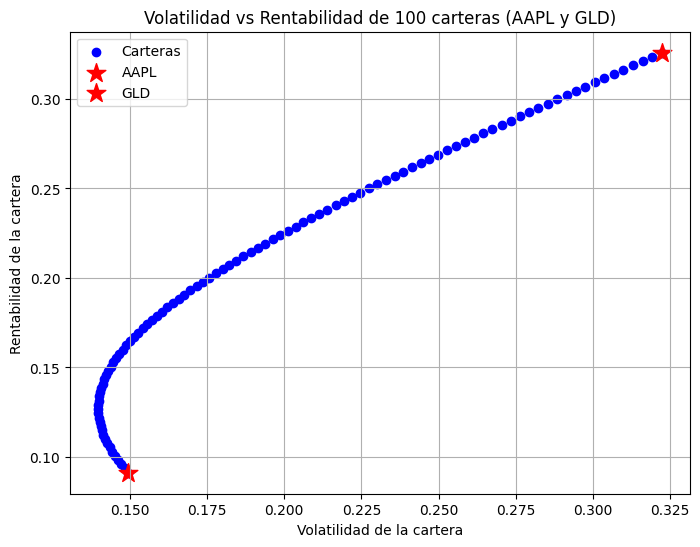

In [15]:
# Dibujar el scatter plot de volatilidades (en el eje X) y rentabilidades (en el eje Y)
plt.figure(figsize=(8, 6))
plt.scatter(volatilidades_carteras, rentabilidades_carteras, c='blue', marker='o', label="Carteras")

# Añadir estrellas rojas para los puntos de AAPL y GLD
plt.scatter(std_aapl, ret_aapl, c='red', marker='*', s=200, label="AAPL")  # AAPL con estrella roja
plt.scatter(std_gld, ret_gld, c='red', marker='*', s=200, label="GLD")    # GLD con estrella roja

# Etiquetas y título
plt.xlabel("Volatilidad de la cartera")
plt.ylabel("Rentabilidad de la cartera")
plt.title("Volatilidad vs Rentabilidad de 100 carteras (AAPL y GLD)")

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

Para calcular los retornos y volatilidades de carteras de varios activos necesitamos multiplicar matrices:

**Rentabilidad** de la cartera $E(\tilde R_p)=\sum_{i=1}^{N}w_i E(\tilde R_i)$

$E(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix}  \begin{pmatrix}\mu_1 \\\mu_2  \\...  \\ \mu_N\end{pmatrix} = \mathbf{w}^T\mathbf{\mu} \qquad siendo \; \mu_i \; la \; rentabilidad \; media \; del \; activo_i$

$\sigma²(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12}^2 & ... & \sigma_{1N}^2\\ 
 \sigma_{21}^2& \sigma_2^2 &...  & \sigma_{2N}^2\\ ... & ... & ... & ...\\  \sigma_{N1}^2& \sigma_{N2}^2 & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}w_1 \\w_2  \\...  \\ w_N\end{pmatrix} = \mathbf{w}^T\mathbf{\Sigma}\mathbf{w}$

<div style="background-color: #e0f7fa; padding: 10px;">

CALCULAR LA RENTABILIDAD Y VOLATILIDAD DE UNA CARTERA EQUIPONDERADA FORMADA POR LOS CUATRO ACTIVOS AAPL, GLD, MSFT Y SPY.

1- Decárga y limpia los datos desde 2010 hasta hoy de Yahoo finance

2- Calcula las rentabilidades medias, volatilidades y covarianzas

3- Genera los pesos y calcula rentabilidd y volatilidad de la cartera

4- Muestra los resultados


1- Decárga y limpia los datos desde 2010 hasta hoy de Yahoo finance

In [20]:
# Definir los activos y el periodo de tiempo
activos = ["AAPL", "GLD", "MSFT", "SPY"]
start_date='2010-01-01'


datos = yf.download(
    activos,
    start=start_date,
    end=end_date,
    auto_adjust=False,
    multi_level_index=True,
)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [21]:
datos.isna().sum()

Ticker
AAPL    0
GLD     0
MSFT    0
SPY     0
dtype: int64

2- Calcula las rentabilidades medias, volatilidades y covarianzas

In [25]:
# Calcular los retornos logarítmicos diarios
retornos = np.log(datos).diff().dropna()

# Calcular las rentabilidades medias, volatilidades (desviación estándar) y la matriz de covarianza
rentabilidades_medias = retornos.mean()
volatilidades = retornos.std()
matriz_covarianza = retornos.cov()

3- Genera los pesos y calcula rentabilidd y volatilidad de la cartera

In [26]:
# Crear pesos iguales para la cartera
pesos = np.array([1/len(activos)] * len(activos))

# Calcular la rentabilidad de la cartera
rentabilidad_cartera = np.dot(pesos, rentabilidades_medias)

# Calcular la volatilidad de la cartera
volatilidad_cartera = np.sqrt(pesos.T@ matriz_covarianza @ pesos)

4- Muestra los resultados

In [27]:
# Mostrar los resultados individuales de los activos
metricas_activos = pd.DataFrame({
    'Rentabilidad Media': rentabilidades_medias,
    'Volatilidad': volatilidades
}, index=activos)

# Resumen de la cartera
resumen_cartera = pd.DataFrame({
    'Rentabilidad de la Cartera': [rentabilidad_cartera],
    'Volatilidad de la Cartera': [volatilidad_cartera]
})

print("Métricas de los Activos:")
print(metricas_activos)
print("\nResumen de la Cartera:")
print(resumen_cartera)


Métricas de los Activos:
      Rentabilidad Media  Volatilidad
AAPL            0.000963     0.017774
GLD             0.000157     0.009805
MSFT            0.000788     0.016333
SPY             0.000482     0.010948

Resumen de la Cartera:
   Rentabilidad de la Cartera  Volatilidad de la Cartera
0                    0.000598                   0.010368


___________________

### Otra forma de abordar el análisis de carteras

Pero también podemos calcular los retornos diarios de la cartera y luego calcular la rentabilidad  media y la volatilidad

$R_{cartera, t} = w_1 * R_{1, t} + w_2 * R_{2, t}$

In [30]:
rentabilidad_cartera = p_aapl * rentabilidad['AAPL'] + p_gld * rentabilidad['GLD']

rentabilidad_cartera



Date
2019-01-02    0.000948
2019-01-03   -0.059344
2019-01-04    0.021834
2019-01-07    0.000044
2019-01-08    0.010246
                ...   
2023-12-22   -0.001568
2023-12-26    0.001330
2023-12-27    0.002122
2023-12-28   -0.000999
2023-12-29   -0.003891
Length: 1258, dtype: float64

In [31]:
rent_cartera_media = rentabilidad_cartera.mean() * 252
std_cartera = rentabilidad_cartera.std() * np.sqrt(252)

print(f'El retorno de la cartera es: {100*rent_cartera_media:.2f} %')
print(f'La volatilidad de la cartera es: {100*std_cartera:.2f} %')

El retorno de la cartera es: 23.20 %
La volatilidad de la cartera es: 20.73 %


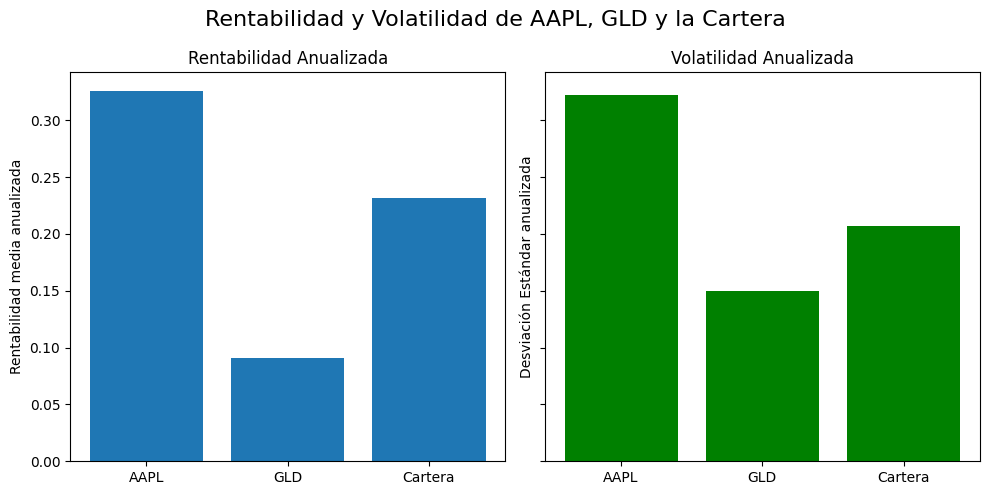

In [32]:
# Filtramos solo los activos que queremos mostrar, AAPL y GLD
means_filtered = means.loc[['AAPL', 'GLD']]
stds_filtered = stds.loc[['AAPL', 'GLD']]

# Añadimos los datos de la cartera
means_filtered['Cartera'] = rent_cartera_media
stds_filtered['Cartera'] = std_cartera

# Crear una figura con dos subplots, uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios (Rentabilidad) en el subplot de la izquierda
axes[0].bar(means_filtered.index, means_filtered.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Rentabilidad Anualizada")

# Crear el gráfico de barras de los valores de desviación estándar en el subplot de la derecha
axes[1].bar(stds_filtered.index, stds_filtered.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad Anualizada")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad de AAPL, GLD y la Cartera", fontsize=16)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

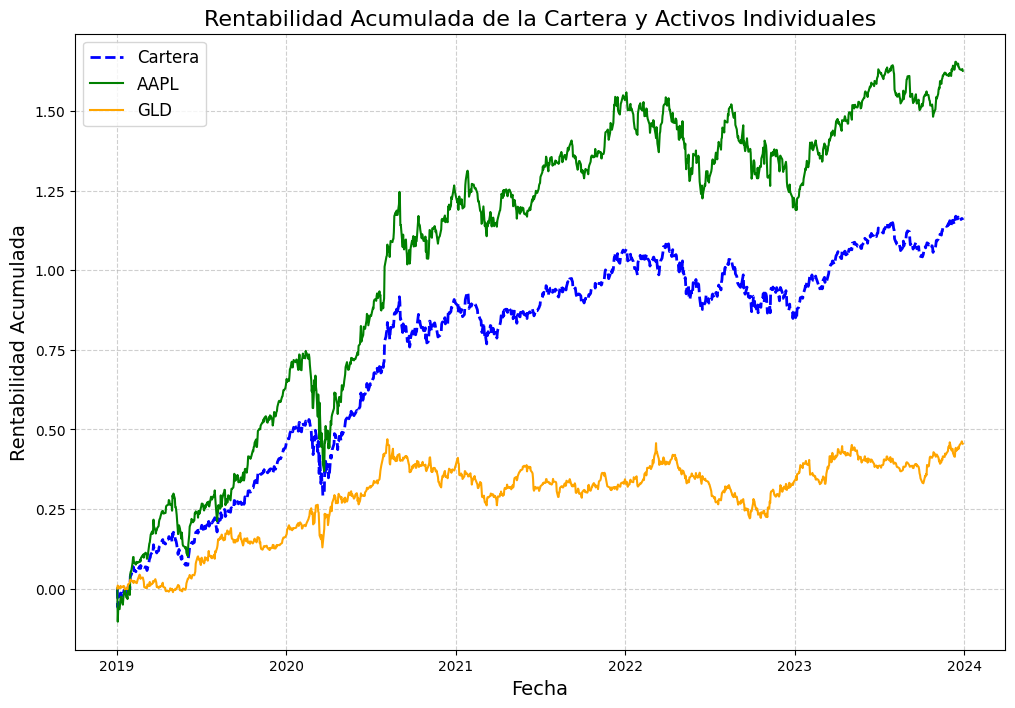

In [33]:
# Cálculo de la rentabilidad acumulada
rentabilidad_cartera_acum = rentabilidad_cartera.cumsum()

# Crear la figura y el tamaño
plt.figure(figsize=(12, 8))

# Trazar la rentabilidad acumulada de la cartera y los activos individuales
plt.plot(rentabilidad['AAPL'].index, rentabilidad_cartera_acum, label='Cartera', linewidth=2, color='blue', linestyle='--')
plt.plot(rentabilidad['AAPL'].cumsum().index, rentabilidad['AAPL'].cumsum(), label='AAPL', linewidth=1.5, color='green')
plt.plot(rentabilidad['GLD'].cumsum().index, rentabilidad['GLD'].cumsum(), label='GLD', linewidth=1.5, color='orange')

# Añadir título y etiquetas a los ejes
plt.title('Rentabilidad Acumulada de la Cartera y Activos Individuales', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Rentabilidad Acumulada', fontsize=14)

# Añadir leyenda
plt.legend(fontsize=12)

# Añadir cuadrícula para mejor visualización
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


______________________________________________

### Ejericio

Calcula los retornos diarios de la cartera equiponderada con los cuatro activos de los ejercicios anteriores haz un gráfico con los retornos acumulados de los activos y de la cartera. Luego calcula la rentabilidad media y la volatilidad de la cartera.

________________________________________________________________

#### CORRELACIÓN ENTRE LOS ACTIVOS

Hemos visto que la varianza de una cartera de dos activos viene definida por:

$$\sigma^2_p= \underset{\text{Activo 1}} {\underbrace{w_1^2\sigma^2_1}}+\underset{\text{Activo 2}} {\underbrace{w_2^2\sigma^2_2}}+ \underset{\text{Relación entre activos}} {\underbrace{2w_1w_2 \sigma_{12}}}$$
       


Podemos generalizar para una cartera con $n$ activos:

$$\sigma^2_p = \underset{\text{Riesgo Activos}} {\underbrace{\sum_{i=1}^n w_i^2 \sigma_i^2}} + \underset{\text{Relación entre activos}} {\underbrace{ \sum_{i=1}^n \sum_{j=1}^n w_i w_j \sigma_{ij}}} \quad \forall i \neq j$$

Una `scatter_matrix`nos presenta una combinación de ``histograma`` en la diagonal principal y un scatter plot con la ``covarianza`` en el resto de posiciones de la matriz.

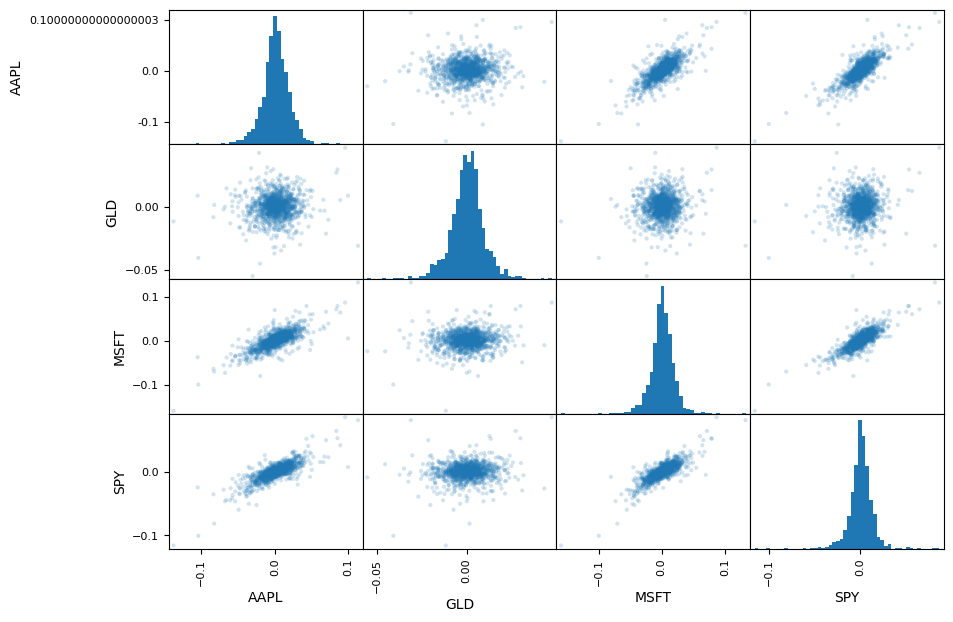

In [34]:
import pandas as pd

pd.plotting.scatter_matrix(rentabilidad, figsize=(10, 7), alpha=0.2, hist_kwds={"bins":50});

Visualizando la covarianza podemos ver si dos activos están correlacionados, pero no podemos ver la fuerza de la correlación. Para ello tenemos que utilizar la correlación y no la covarianza.

$$Var(x)=\frac{1}{n}\sum_{i=1}^{n}{(x-\bar{x})^2}$$

$$Std(x)=\sqrt{Var(x)}$$

$$Cov(x,y)=\frac{1}{n}\sum_{i=1}^{n}{(x-\bar{x})(y-\bar{y})} $$

$$Corr(x,y)=\frac{Cov(x,y)}{Std(x)Std(y)}$$

In [46]:
corr = rentabilidad.corr()
corr

Ticker,AAPL,GLD,MSFT,SPY
Ticker,,,,
AAPL,1.000000,0.085376,0.760847,0.805812
GLD,0.085376,1.000000,0.091757,0.107630
MSFT,0.760847,0.091757,1.000000,0.825804
SPY,0.805812,0.107630,0.825804,1.000000


Heatmap

Ref.: https://seaborn.pydata.org/generated/seaborn.heatmap.html

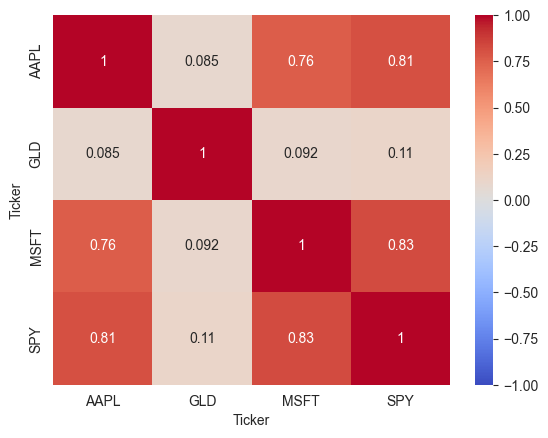

In [47]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

______________________________________________________

### Ejercicio

Identifica cuáles son los dos activos con mayor correlación y los dos con menor correlación de los cuatro activos que hemos utilizado en los ejercicios anteriores.

In [48]:
#TO-DO

________________________________________________

## Simulaciones de carteras aleatorias

A partir de los datos descargados de los cuatro activos, genera 5000 carteras aleatorias y represéntalas.

In [35]:
# Generamos pesos aleatorios para 5000 carteras de 4 activos.
num_carteras = 5000
num_activos = 4

rng = np.random.default_rng(42)
pesos = rng.random(size=(num_carteras, num_activos))
pesos = pesos / np.sum(pesos, axis=1, keepdims=True)

pesos.shape

(5000, 4)

In [37]:
# Calculamos los retornos de las carteras utilizando multiplicación matricial.
retornos_diarios_carteras = rentabilidad @ pesos.T  # (2137, 4) @ (4, 5000) = (2137, 5000)

retornos_diarios_carteras.shape

(1258, 5000)

In [38]:
# Calculamos el retorno esperado de cada cartera.
retornos_mean_carteras = retornos_diarios_carteras.mean(axis=0)

retornos_mean_carteras.shape

(5000,)

In [39]:
# Calculamos el riesgo de cada cartera.
std_carteras = retornos_diarios_carteras.std(axis=0)

std_carteras.shape

(5000,)

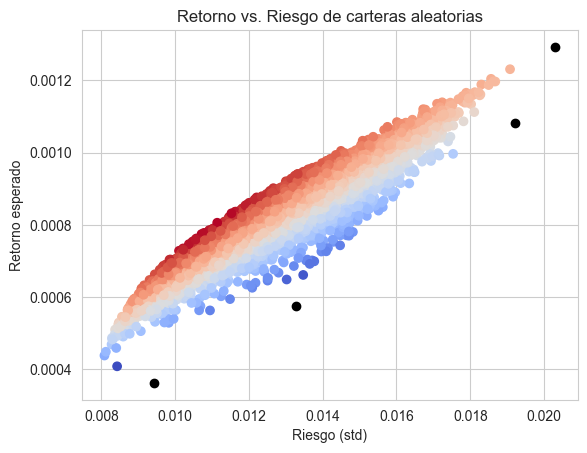

In [ ]:

# Graficamos rentabilidad vs. riesgo.
plt.scatter(x=std_carteras, y=retornos_mean_carteras, c=retornos_mean_carteras / std_carteras, marker="o", cmap="coolwarm")

# Graficamos los activos individuales.
for asset_name in rentabilidad.columns:
    asset_ret = rentabilidad[asset_name].mean()
    aset_std = rentabilidad[asset_name].std()

    plt.plot(aset_std, asset_ret, "o", color="black")

plt.xlabel("Riesgo (std)")
plt.ylabel("Retorno esperado")
plt.title("Retorno vs. Riesgo de carteras aleatorias")
plt.show()

_________________________________________________

### Ejercicio

Genera 5000 carteras aleatorias con los cuatro activos que hemos utilizado en los ejercicios anteriores y represéntalas en un gráfico de dispersión.